In [10]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plot


# Read in the Data

df = pd.read_csv(r'C:\Users\ashvi\Desktop\Payment_and_value_of_care_-_Hospital.csv')


In [2]:
# Display the Data
df.head()

,index,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,...,Lower estimate,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure End Date,Location
0,0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,...,"$20,404","$26,226",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
1,1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart failure patients,...,"$15,237","$17,547",NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
2,2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for pneumonia patients,...,"$13,642","$15,118",NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n"
3,3,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart attack patients,...,Not Available,Not Available,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n"
4,4,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart failure patients,...,"$14,390","$19,228",NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n"


In [11]:
# To check if there is any data missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

index - 0.0%
Provider ID - 0.0%
Hospital name - 0.0%
Address - 0.0%
City - 0.0%
State - 0.0%
ZIP Code - 0.0%
County name - 0.00311332503113325%
Phone number - 0.0%
Payment measure name - 0.0%
Payment measure ID - 0.0%
Payment category - 0.0%
Denominator - 0.0%
Payment - 0.31645219316452194%
Lower estimate - 0.0%
Higher estimate - 0.0%
Payment footnote - 0.6835478068354781%
Value of care display name - 0.0%
Value of care display ID - 0.0%
Value of care category - 0.0%
Value of care footnote - 0.68361699183617%
Measure start date - 0.0%
Measure End Date - 0.0%
Location - 0.0%


In [13]:
# Data Types of Columns

df.dtypes

index                          int64
Provider ID                    int64
Hospital name                 object
Address                       object
City                          object
State                         object
ZIP Code                       int64
County name                   object
Phone number                   int64
Payment measure name          object
Payment measure ID            object
Payment category              object
Denominator                   object
Payment                       object
Lower estimate                object
Higher estimate               object
Payment footnote              object
Value of care display name    object
Value of care display ID      object
Value of care category        object
Value of care footnote        object
Measure start date            object
Measure End Date              object
Location                      object
dtype: object

In [17]:
# Extract Year From Dates

df['Year Started'] = df['Measure start date'].astype(str).str[6:]
df


,index,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,...,Higher estimate,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure End Date,Location,Year Started
0,0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,...,"$26,226",NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2012
1,1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart failure patients,...,"$17,547",NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2012
2,2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for pneumonia patients,...,"$15,118",NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2012
3,3,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart attack patients,...,Not Available,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n",2012
4,4,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart failure patients,...,"$19,228",NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n",2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14449,14449,670087,BAYLOR SCOTT & WHITE EMERGENCY MEDICAL CENTER ...,900 EAST WHITESTONE BLVD,CEDAR PARK,TX,78613,WILLIAMSON,5126844911,Payment for heart attack patients,...,Not Available,5 - Results are not available for this reporti...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"900 EAST WHITESTONE BLVD\nCEDAR PARK, TX 78613...",2012
14450,14450,521323,MEMORIAL MEDICAL CENTER,216 SUNSET PLACE,NEILLSVILLE,WI,54456,CLARK,7157433101,Payment for heart attack patients,...,Not Available,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"216 SUNSET PLACE\nNEILLSVILLE, WI 54456\n(44.5...",2012
14451,14451,521359,MEMORIAL MEDICAL CENTER,1615 MAPLE LANE,ASHLAND,WI,54806,ASHLAND,7156855500,Payment for pneumonia patients,...,"$15,274",NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"1615 MAPLE LANE\nASHLAND, WI 54806\n(46.566887...",2012
14452,14452,531313,STAR VALLEY MEDICAL CENTER,901 ADAMS STREET,AFTON,WY,83110,LINCOLN,3078855800,Payment for pneumonia patients,...,"$20,746",NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Average mortality and higher payment,NaN,07/01/2012,06/30/2015,"901 ADAMS STREET\nAFTON, WY 83110\n(42.717384,...",2012


In [25]:
# Extract Year From Dates

df['Year Ended'] = df['Measure End Date'].astype(str).str[6:]
df

,index,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,...,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure End Date,Location,Year Started,Year Ended
0,0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,...,NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2012,2015
1,1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart failure patients,...,NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2012,2015
2,2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for pneumonia patients,...,NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2012,2015
3,3,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart attack patients,...,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n",2012,2015
4,4,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart failure patients,...,NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n",2012,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14449,14449,670087,BAYLOR SCOTT & WHITE EMERGENCY MEDICAL CENTER ...,900 EAST WHITESTONE BLVD,CEDAR PARK,TX,78613,WILLIAMSON,5126844911,Payment for heart attack patients,...,5 - Results are not available for this reporti...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"900 EAST WHITESTONE BLVD\nCEDAR PARK, TX 78613...",2012,2015
14450,14450,521323,MEMORIAL MEDICAL CENTER,216 SUNSET PLACE,NEILLSVILLE,WI,54456,CLARK,7157433101,Payment for heart attack patients,...,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"216 SUNSET PLACE\nNEILLSVILLE, WI 54456\n(44.5...",2012,2015
14451,14451,521359,MEMORIAL MEDICAL CENTER,1615 MAPLE LANE,ASHLAND,WI,54806,ASHLAND,7156855500,Payment for pneumonia patients,...,NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"1615 MAPLE LANE\nASHLAND, WI 54806\n(46.566887...",2012,2015
14452,14452,531313,STAR VALLEY MEDICAL CENTER,901 ADAMS STREET,AFTON,WY,83110,LINCOLN,3078855800,Payment for pneumonia patients,...,NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Average mortality and higher payment,NaN,07/01/2012,06/30/2015,"901 ADAMS STREET\nAFTON, WY 83110\n(42.717384,...",2012,2015


In [26]:
# To Drop Duplicate Entries

df.drop_duplicates()

,index,Provider ID,Hospital name,Address,City,State,ZIP Code,County name,Phone number,Payment measure name,...,Payment footnote,Value of care display name,Value of care display ID,Value of care category,Value of care footnote,Measure start date,Measure End Date,Location,Year Started,Year Ended
0,0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart attack patients,...,NaN,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2012,2015
1,1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for heart failure patients,...,NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2012,2015
2,2,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Payment for pneumonia patients,...,NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Worse mortality and average payment,NaN,07/01/2012,06/30/2015,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL 35957\n",2012,2015
3,3,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart attack patients,...,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n",2012,2015
4,4,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Payment for heart failure patients,...,NaN,Value of Care Heart Failure measure,MORT_PAYM_30_HF,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"209 NORTH MAIN STREET\nWEDOWEE, AL 36278\n",2012,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14449,14449,670087,BAYLOR SCOTT & WHITE EMERGENCY MEDICAL CENTER ...,900 EAST WHITESTONE BLVD,CEDAR PARK,TX,78613,WILLIAMSON,5126844911,Payment for heart attack patients,...,5 - Results are not available for this reporti...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"900 EAST WHITESTONE BLVD\nCEDAR PARK, TX 78613...",2012,2015
14450,14450,521323,MEMORIAL MEDICAL CENTER,216 SUNSET PLACE,NEILLSVILLE,WI,54456,CLARK,7157433101,Payment for heart attack patients,...,1 - The number of cases/patients is too few to...,Value of Care Heart Attack measure,MORT_PAYM_30_AMI,Not Available,13 - Results cannot be calculated for this rep...,07/01/2012,06/30/2015,"216 SUNSET PLACE\nNEILLSVILLE, WI 54456\n(44.5...",2012,2015
14451,14451,521359,MEMORIAL MEDICAL CENTER,1615 MAPLE LANE,ASHLAND,WI,54806,ASHLAND,7156855500,Payment for pneumonia patients,...,NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Average mortality and average payment,NaN,07/01/2012,06/30/2015,"1615 MAPLE LANE\nASHLAND, WI 54806\n(46.566887...",2012,2015
14452,14452,531313,STAR VALLEY MEDICAL CENTER,901 ADAMS STREET,AFTON,WY,83110,LINCOLN,3078855800,Payment for pneumonia patients,...,NaN,Value of Care Pneumonia measure,MORT_PAYM_30_PN,Average mortality and higher payment,NaN,07/01/2012,06/30/2015,"901 ADAMS STREET\nAFTON, WY 83110\n(42.717384,...",2012,2015


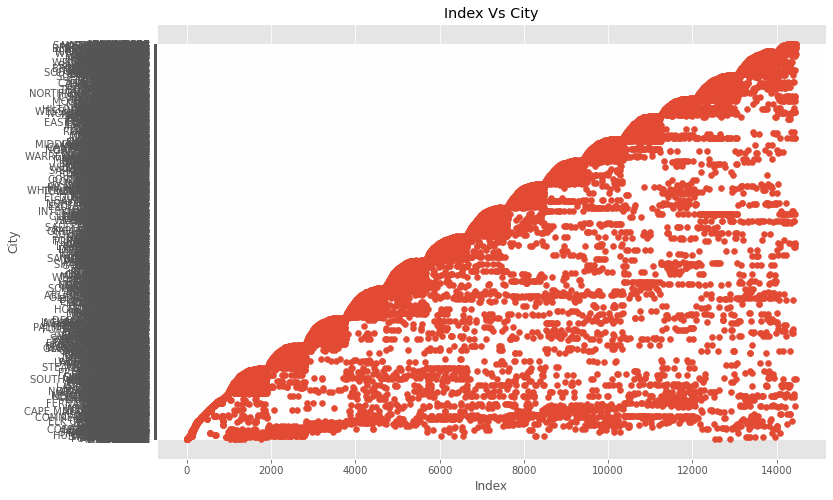

In [32]:
# Correlation using scatter chart

plt.scatter(x=df['index'], y=df['City'])


plt.title('Index Vs City')
plt.xlabel('Index')
plt.ylabel('City')

plt.show()

<AxesSubplot:xlabel='index', ylabel='ZIP Code'>

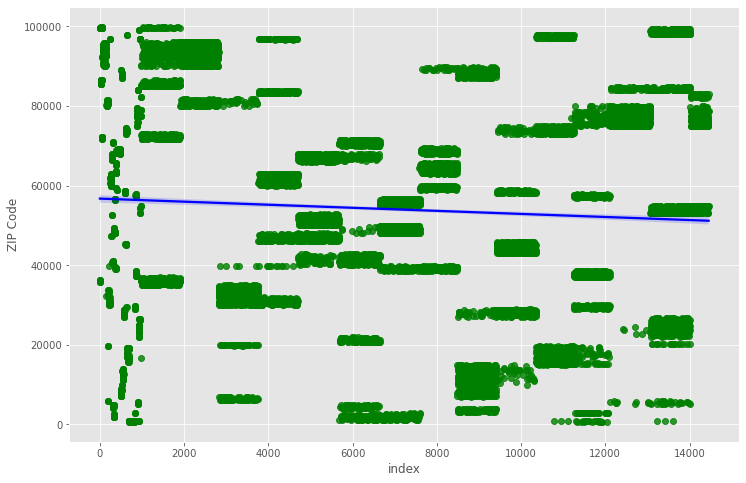

In [38]:
# Plot Index Vs City using Seaborn

sns.regplot(x='index', y='ZIP Code', data=df, scatter_kws={"color": "green"}, line_kws={"color": "blue"})

In [39]:
df.corr()

,index,Provider ID,ZIP Code,Phone number
index,1.000000,0.857961,-0.059634,-0.005994
Provider ID,0.857961,1.000000,-0.114155,0.022077
ZIP Code,-0.059634,-0.114155,1.000000,0.020317
Phone number,-0.005994,0.022077,0.020317,1.000000


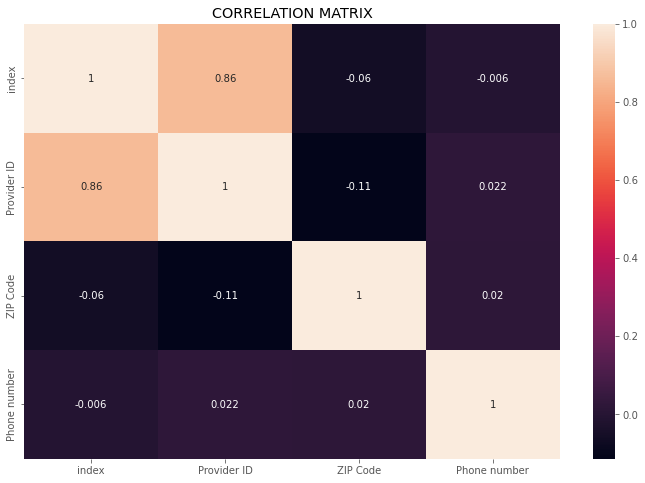

In [41]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('CORRELATION MATRIX')

plt.show()